In [1]:
from numpy import *

In [2]:
def file2matrix(filename):
    fr = open(filename)
    
    numberOfLines = len(fr.readlines())    # Gets the number of lines (samples)
    
    matrix = zeros((numberOfLines,3))      # Creates an empty matrix de numberOfLines x 3 cells
    
    classLabelVector = []                  # Empty vector for the labels
    
    fr = open(filename)
    
    index = 0
    for line in fr.readlines():            # Reads all the file
        line = line.strip()                # Removes spaces
        listFromLine = line.split('\t')    # Splits data, the separator is the tab
        
        matrix[index,:] = listFromLine[0:3] # Adds the 3 values of the line to a row of the Matrix
        classLabelVector.append(int(listFromLine[-1])) # Adds the label to the same line in the vector
        #classLabelVector.append(listFromLine[-1])
        
        index += 1                         # next line
        
    return matrix, classLabelVector

In [3]:
datingDataMatrix, datingLabels = file2matrix('datingTestSet2.txt')

In [4]:
# Dibujar los valores
import matplotlib
import matplotlib.pyplot as plt

#figure = plt.figure()
#ax = figure.add_subplot(111)
#ax.scatter(datingDataMatrix[:,1], datingDataMatrix[:,2], 15.0*array(datingLabels), 15.0*array(datingLabels))
#plt.show()

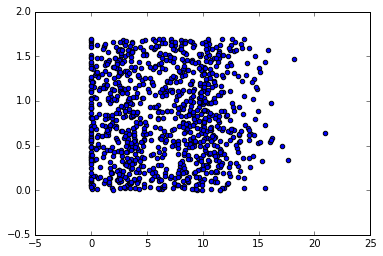

In [5]:
figure = plt.figure() # Gets a figure object from matplotlib
ax = figure.add_subplot(111)
ax.scatter(datingDataMatrix[:,1],datingDataMatrix[:,2]) # Colum 2 (% time videogames) as X and Column 3 (liters/week icecream ) as Y
plt.show()

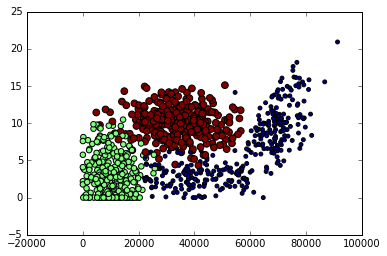

In [6]:
figure = plt.figure() # Gets a figure object from matplotlib
ax = figure.add_subplot(111)
ax.scatter(datingDataMatrix[:,0],datingDataMatrix[:,1], 15.0 * array(datingLabels), 15.0*array(datingLabels)) 
# Colum 1 (flyer miles/year) as X and Column 2 (% videogames) as Y
plt.show()

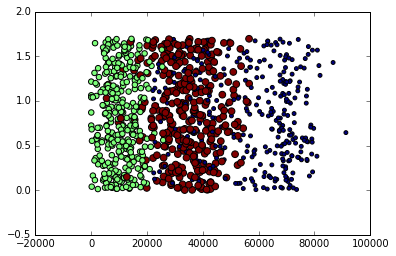

In [7]:
figure = plt.figure() # Gets a figure object from matplotlib
ax = figure.add_subplot(111)
ax.scatter(datingDataMatrix[:,0],datingDataMatrix[:,2], 15.0 * array(datingLabels), 15.0*array(datingLabels)) 
# Colum 1 (flyer miles/year) as X and Column 2 (liters/week icecream) as Y
plt.show()

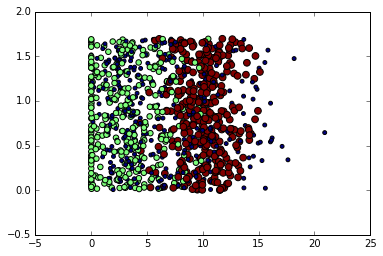

In [8]:
figure = plt.figure() # Gets a figure object from matplotlib
ax = figure.add_subplot(111)
ax.scatter(datingDataMatrix[:,1],datingDataMatrix[:,2], 15.0 * array(datingLabels), 15.0*array(datingLabels)) 
# Colum 1 (% videogames) as X and Column 2 (liters/week icecream) as Y
plt.show()

In [9]:
def autoNormalize(dataset):
    minValue = dataset.min(0)
    maxValue = dataset.max(0)
    
    ranges = maxValue-minValue
    
    normalizedDataSet = zeros(shape(dataset))
    
    rowsNumber = dataset.shape[0]
    
    normalizedDataSet = dataset - tile(minValue, (rowsNumber,1))
    normalizedDataSet = normalizedDataSet/tile(ranges, (rowsNumber,1))
    
    return normalizedDataSet, ranges, minValue

In [10]:
normalizedDatingMatrix, ranges, minValue = autoNormalize(datingDataMatrix)

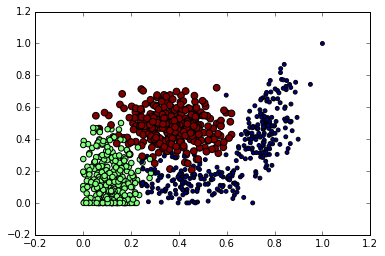

In [11]:
figure = plt.figure() # Gets a figure object from matplotlib
ax = figure.add_subplot(111)
ax.scatter(normalizedDatingMatrix[:,0],normalizedDatingMatrix[:,1], 15.0 * array(datingLabels), 15.0*array(datingLabels)) 
# Colum 1 (flyer miles/year) as X and Column 2 (% videogames) as Y
plt.show()

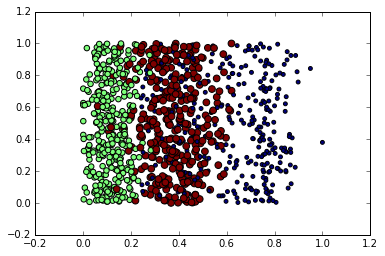

In [12]:
figure = plt.figure() # Gets a figure object from matplotlib
ax = figure.add_subplot(111)
ax.scatter(normalizedDatingMatrix[:,0],normalizedDatingMatrix[:,2], 15.0 * array(datingLabels), 15.0*array(datingLabels)) 
# Colum 1 (flyer miles/year) as X and Column 2 (liters/week icecream) as Y
plt.show()

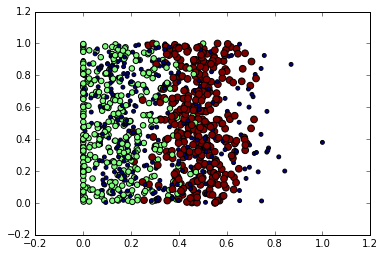

In [13]:
figure = plt.figure() # Gets a figure object from matplotlib
ax = figure.add_subplot(111)
ax.scatter(normalizedDatingMatrix[:,1],normalizedDatingMatrix[:,2], 15.0 * array(datingLabels), 15.0*array(datingLabels)) 
# Colum 1 (% videogames) as X and Column 2 (liters/week icecream) as Y
plt.show()

In [16]:
import operator

def classify0(inX, dataSet, labels, k):
    # TODO: Añadir asserts
    # inX es un vector
    # dataSet es una matriz
    # labels es un vector
    # el numero de elementos de labels = numero de filas de dataset
    # k es un entero menor que el numero de filas de dataset
    
    
    
    # CALCULANDO UNA MATRIZ DE DISTANCIAS ENTRE inX Y LOS PUNTOS EXISTENTES EN dataSet
    # para ello se calcula la distancia Euclidiana con cada uno de los puntos
    # La funcion 'tile' repite el vector inX en una matriz de dataSetSize filas y 1 columna
    # A esa matriz se le resta el data set
    dataSetSize = dataSet.shape[0]
    differentialMatrix = tile(inX, (dataSetSize,1)) - dataSet
    squaredDifferentialMatrix = differentialMatrix**2
    # Results in vectors
    squaredDistances = squaredDifferentialMatrix.sum(axis=1)
    distances = squaredDistances**0.5
    
    #TODO: NECESITO ENTENDER COMO FUNCIONA ESTE argsort
    sortedDistancesIndexes = distances.argsort()
    
    classCount = {}
    
    for i in range(k):
        label = labels[sortedDistancesIndexes[i]]
        classCount[label] = classCount.get(label,0) + 1
        
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    
    return sortedClassCount[0][0]

In [26]:
def datingClassTest():
    hoRatio = 0.05
    
    datingMatrix, datingLabels = file2matrix('datingTestSet2.txt')
    
    normalizedDatingMatrix, ranges, minValue = autoNormalize(datingMatrix)
    
    numberOfRows = normalizedDatingMatrix.shape[0]
    
    numTestVecs = int(numberOfRows*hoRatio)
    
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normalizedDatingMatrix[i,:], normalizedDatingMatrix[numTestVecs:numberOfRows,:], datingLabels[numTestVecs:numberOfRows], 5)
        
        print("The classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        
        if (classifierResult != datingLabels[i]):
            errorCount += 1.0
    
    print("The total error rate is: %f" % (errorCount/float(numTestVecs)))

In [27]:
datingClassTest()

The classifier came back with: 3, the real answer is: 3
The classifier came back with: 2, the real answer is: 2
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 3, the real answer is: 3
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 2, the real answer is: 2
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answer is: 1
The classifier came back with: 1, the real answe

In [31]:
def classifyPerson():
    resultList = ['Not at all', 'In small doses', 'In large doses']
    
    percentTats = float(input("Percentage of time spent playing video games?"))
    ffMiles = float(input("Frequent flier miles earned per year?"))
    iceCream= float(input("Liters of ice cream consumed per year?"))
    
    datingDataMatrix, datingLabels = file2matrix('datingTestSet2.txt')
    
    normalizedMatrix, ranges, minVal = autoNormalize(datingDataMatrix)
    
    inArray = ([ffMiles, percentTats, iceCream])
    
    classifierResult = classify0((inArray-minVal)/ranges, normalizedMatrix, datingLabels, 5)
    
    print("You will probably like this person: ", resultList[classifierResult-1])

In [32]:
classifyPerson()

Percentage of time spent playing video games?0.5
Frequent flier miles earned per year?100
Liters of ice cream consumed per year?25
You will probably like this person:  In small doses
